In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
ls drive/MyDrive/Competition/COGAI/medical_data/


'Copy of Problem Description_Heart.docx'   MedicalData_Train.xlsx
 MedicalData_Test.xlsx


In [3]:
import os
os.chdir("drive/MyDrive/Competition/COGAI/medical_data/")

In [4]:
ls

'Copy of Problem Description_Heart.docx'   MedicalData_Train.xlsx
 MedicalData_Test.xlsx


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer, make_column_transformer
import matplotlib.pyplot as plt

from scipy import stats
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score , accuracy_score
from sklearn.metrics import roc_auc_score,classification_report,accuracy_score

In [6]:
raw_train = pd.read_excel('MedicalData_Train.xlsx')
raw_test = pd.read_excel('MedicalData_Test.xlsx')

In [7]:
raw_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
raw_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.00000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,53.760563,0.647887,1.056338,130.971831,247.220657,0.15493,0.553991,151.746479,0.300469,0.875587,1.478873,0.629108,2.206573,0.666667
std,8.953967,0.478754,1.040056,17.460715,52.936444,0.36269,0.525882,23.641217,0.459542,1.035805,0.603273,0.960787,0.594435,0.472515
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.00000,0.000000,139.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,240.000000,0.00000,1.000000,156.000000,0.000000,0.500000,2.000000,0.000000,2.000000,1.000000
75%,59.000000,1.000000,2.000000,140.000000,275.000000,0.00000,1.000000,169.000000,1.000000,1.500000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.00000,2.000000,202.000000,1.000000,4.400000,2.000000,4.000000,3.000000,1.000000


In [9]:
raw_train.target.value_counts()

1    142
0     71
Name: target, dtype: int64

In [10]:
df = raw_train.copy()
df_test = raw_test.copy()

In [ ]:
df.shape

In [ ]:
df.dtypes

# EDA

In [ ]:
df.isnull().sum()

In [ ]:
duplicate_rows= df[df.duplicated(keep='first')]
duplicate_rows.head(5)

In [ ]:
fig, (axes) = plt.subplots(nrows=1, ncols=14, figsize=(24, 5))

sns.boxplot(data=df[['age']], palette='Set2',ax=axes[0])
sns.boxplot(data=df[['sex']], palette='Set2',ax=axes[1])
sns.boxplot(data=df[['cp']], palette='Set2',ax=axes[2])
sns.boxplot(data=df[['trestbps']], palette='Set2',ax=axes[3])  
sns.boxplot(data=df[['chol']], palette='Set2',ax=axes[4])
sns.boxplot(data=df[['fbs']], palette='Set2',ax=axes[5])
sns.boxplot(data=df[['restecg']], palette='Set2',ax=axes[6])
sns.boxplot(data=df[['thalach']], palette='Set2',ax=axes[7])
sns.boxplot(data=df[['exang']], palette='Set2',ax=axes[8])
sns.boxplot(data=df[['oldpeak']], palette='Set2',ax=axes[9])
sns.boxplot(data=df[['slope']], palette='Set2',ax=axes[10])  
sns.boxplot(data=df[['ca']], palette='Set2',ax=axes[11])
sns.boxplot(data=df[['thal']], palette='Set2',ax=axes[12])
sns.boxplot(data=df[['target']], palette='Set2',ax=axes[13])
  

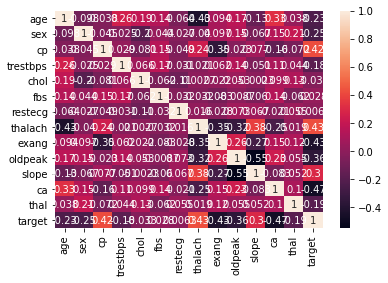

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
df['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 70, 77, 38])

In [ ]:
df['sex'].unique()

array([1, 0])

In [ ]:
df['cp'].unique()

array([3, 2, 1, 0])

In [ ]:
df['trestbps'].unique()      

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 174, 192, 144, 123,
       146, 154, 114, 170, 164])

In [ ]:
df['chol'].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 289, 322, 299, 300, 293, 282, 249, 274,
       184, 409, 259, 200, 228, 230, 206, 327, 149, 286, 237, 218, 319,
       166, 311, 335, 225, 169, 187, 176, 241, 131])

In [ ]:
df['fbs'].unique()

array([1, 0])

In [ ]:
df['restecg'].unique()

array([0, 1, 2])

In [ ]:
df['thalach'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 109, 112,  88, 120, 195, 106,  95, 108, 117, 116, 103,  71,
       118, 141, 134, 136,  90])

In [ ]:
df['exang'].unique()

array([0, 1])

In [ ]:
df['oldpeak'].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 2.2, 2.9,
       2.1, 0.9, 3.8, 3.4, 3.2, 0.3, 3.6, 4.4, 2.8, 4. ])

In [ ]:
df['slope'].unique()

array([0, 2, 1])

In [ ]:
df['ca'].unique()

array([0, 2, 1, 3, 4])

In [ ]:
df['thal'].unique()

array([1, 2, 3, 0])

In [ ]:
df['target'].unique()

array([1, 0])

# split

In [17]:
x_train = df.drop(['target'],axis=1)
y_train = df['target']

In [18]:
df['target'].value_counts()

1    142
0     71
Name: target, dtype: int64

# Utility *function*

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score , accuracy_score
from sklearn.metrics import roc_auc_score,classification_report,accuracy_score

In [35]:
# Utility function to print metircs
def print_stats(y_true,y_pred,y_pred_prob):
    print("ROC_AUC_Score",roc_auc_score(y_true,y_pred_prob))
    print("Classification report \n",classification_report(y_true, y_pred))
    print("Accuracy Score: ",accuracy_score(y_true, y_pred))

Models

# Models

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train, test_size=0.2,random_state=31)

### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
def logistic_regression(x_train,y_train):
  clf = LogisticRegression()
  clf.fit(x_train,y_train)
  return clf

In [41]:
clf_lr = logistic_regression(x_train,y_train)
y_pred = clf_lr.predict(x_valid)
y_pred_prob=clf_lr.predict_proba(x_valid)[:, 1]
#y_pred[y_pred >=0.5] = 1
#y_pred[y_pred<0.5] = 0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [44]:
y_pred_prob

array([0.03641093, 0.98598168, 0.01753041, 0.98258253, 0.62775089,
       0.87313367, 0.85365885, 0.32875072, 0.08530073, 0.88373893,
       0.91773925, 0.95315994, 0.97975592, 0.84185017, 0.83998711,
       0.14881272, 0.98300552, 0.48389025, 0.98154838, 0.88200116,
       0.90157029, 0.11464352, 0.89852853, 0.89252417, 0.77831838,
       0.91391521, 0.97448371, 0.54695826, 0.92504404, 0.91508628,
       0.9878483 , 0.95127537, 0.69285208, 0.90047368])

In [45]:
print_stats(y_valid,y_pred,y_pred_prob)

ROC_AUC_Score 0.8941798941798942
Classification report 
               precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.93      0.93      0.93        27

    accuracy                           0.88        34
   macro avg       0.82      0.82      0.82        34
weighted avg       0.88      0.88      0.88        34

Accuracy Score:  0.8823529411764706


XGB

In [72]:
from xgboost import XGBClassifier
clf_xgb = XGBClassifier()
clf_xgb.fit(x_train, y_train)
y_pred = clf_xgb.predict(x_valid)
y_pred_prob=clf_xgb.predict_proba(x_valid)[:, 1]

In [73]:
count=0
for value in y_train:
  if value == 0:
    count+=1
print(count)

50


In [74]:
y_train.value_counts()

1    86
0    50
Name: target, dtype: int64

In [75]:
len(y_train)

136

In [76]:
print_stats(y_valid,y_pred,y_pred_prob)

ROC_AUC_Score 0.873015873015873
Classification report 
               precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.96      0.85      0.90        27

    accuracy                           0.85        34
   macro avg       0.78      0.85      0.80        34
weighted avg       0.88      0.85      0.86        34

Accuracy Score:  0.8529411764705882


### Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier 

In [54]:
from sklearn.tree import DecisionTreeClassifier 
def decision_tree(x_train,y_train):
  clf_dt = DecisionTreeClassifier()
  clf_dt.fit(x_train,y_train) 
  clf_dt.fit(x_train, y_train) 
  return clf_dt

In [55]:
clf_dt = decision_tree(x_train,y_train)
y_pred = clf_dt.predict(x_valid)
y_pred_prob=clf_dt.predict_proba(x_valid)[:, 1]

In [56]:
print_stats(y_valid,y_pred,y_pred_prob)

ROC_AUC_Score 0.5846560846560847
Classification report 
               precision    recall  f1-score   support

           0       0.30      0.43      0.35         7
           1       0.83      0.74      0.78        27

    accuracy                           0.68        34
   macro avg       0.57      0.58      0.57        34
weighted avg       0.72      0.68      0.70        34

Accuracy Score:  0.6764705882352942


### Random Forest

In [70]:
clf_rf = RandomForestClassifier()
clf_rf = clf_rf.fit(x_train, y_train)
y_pred = clf_rf.predict(x_valid)
y_pred_prob=clf_rf.predict_proba(x_valid)[:, 1]

In [71]:
print_stats(y_valid,y_pred,y_pred_prob)

ROC_AUC_Score 0.9047619047619048
Classification report 
               precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.93      0.93      0.93        27

    accuracy                           0.88        34
   macro avg       0.82      0.82      0.82        34
weighted avg       0.88      0.88      0.88        34

Accuracy Score:  0.8823529411764706


### Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB
clf_nb= GaussianNB()
clf_nb=clf_nb.fit(x_train, y_train)
y_pred = clf_nb.predict(x_valid)
y_pred_prob=clf_nb.predict_proba(x_valid)[:, 1]

In [58]:
print_stats(y_valid,y_pred,y_pred_prob)

ROC_AUC_Score 0.8994708994708995
Classification report 
               precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.89      0.93      0.91        27

    accuracy                           0.85        34
   macro avg       0.78      0.75      0.76        34
weighted avg       0.85      0.85      0.85        34

Accuracy Score:  0.8529411764705882


### KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
clf_knn = clf_knn.fit(x_train, y_train)
y_pred = clf_knn.predict(x_valid)
y_pred_prob=clf_knn.predict_proba(x_valid)[:, 1]

In [60]:
print_stats(y_valid,y_pred,y_pred_prob)

ROC_AUC_Score 0.6957671957671958
Classification report 
               precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.85      0.85      0.85        27

    accuracy                           0.76        34
   macro avg       0.64      0.64      0.64        34
weighted avg       0.76      0.76      0.76        34

Accuracy Score:  0.7647058823529411


### Light GBM

In [61]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier().fit(x_train,y_train)
y_pred = lgbm.predict(x_valid)


In [62]:
y_pred_prob=lgbm.predict_proba(x_valid)[:, 1]
print_stats(y_valid,y_pred,y_pred_prob)

ROC_AUC_Score 0.8888888888888888
Classification report 
               precision    recall  f1-score   support

           0       0.55      0.86      0.67         7
           1       0.96      0.81      0.88        27

    accuracy                           0.82        34
   macro avg       0.75      0.84      0.77        34
weighted avg       0.87      0.82      0.84        34

Accuracy Score:  0.8235294117647058


### Catboost

In [67]:
# !pip install catboost

In [66]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier()
cb.fit(x_train,y_train)


Learning rate set to 0.004395
0:	learn: 0.6898661	total: 49.6ms	remaining: 49.6s
1:	learn: 0.6876940	total: 50.5ms	remaining: 25.2s
2:	learn: 0.6849996	total: 51.2ms	remaining: 17s
3:	learn: 0.6810541	total: 51.9ms	remaining: 12.9s
4:	learn: 0.6775382	total: 52.6ms	remaining: 10.5s
5:	learn: 0.6748015	total: 53.3ms	remaining: 8.84s
6:	learn: 0.6722412	total: 53.8ms	remaining: 7.63s
7:	learn: 0.6693575	total: 54.5ms	remaining: 6.76s
8:	learn: 0.6653773	total: 55ms	remaining: 6.05s
9:	learn: 0.6618099	total: 55.7ms	remaining: 5.51s
10:	learn: 0.6601851	total: 56ms	remaining: 5.03s
11:	learn: 0.6574108	total: 56.7ms	remaining: 4.67s
12:	learn: 0.6549931	total: 57.4ms	remaining: 4.36s
13:	learn: 0.6525329	total: 58.1ms	remaining: 4.09s
14:	learn: 0.6493862	total: 58.9ms	remaining: 3.87s
15:	learn: 0.6462202	total: 59.6ms	remaining: 3.67s
16:	learn: 0.6438324	total: 60.4ms	remaining: 3.49s
17:	learn: 0.6418294	total: 61.1ms	remaining: 3.33s
18:	learn: 0.6394229	total: 61.8ms	remaining: 3.19

In [69]:
y_pred = cb.predict(x_valid)
y_pred_prob=cb.predict_proba(x_valid)[:, 1]
print_stats(y_valid,y_pred,y_pred_prob)

ROC_AUC_Score 0.9259259259259259
Classification report 
               precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.92      0.89      0.91        27

    accuracy                           0.85        34
   macro avg       0.77      0.80      0.79        34
weighted avg       0.86      0.85      0.86        34

Accuracy Score:  0.8529411764705882
